In [2]:
import sys
sys.path.append("../../src/other_methods")
sys.path.append("../..")

import yaml
import os
import numpy as np
import matplotlib.pyplot as plt

from PMMR.data_class import PVTrainDataSet, PVTestDataSet
from PMMR.kpv import KernelPVModelV2
from src.generate_experiment_data import generate_synthetic_data

In [2]:
data_size = 1000
seed = np.random.randint(1000000)
np.random.seed(seed)

U, W, Z, A, Y, do_A, EY_do_A = generate_synthetic_data(size = data_size, seed = seed)

train_data_perc = 1.0
test_data_perc = 1 - train_data_perc

indices = np.random.permutation(A.shape[0])
train_data_size = int(A.shape[0] * train_data_perc)
training_idx, test_idx = indices[:train_data_size], indices[train_data_size:]

A_train, Y_train, W_train, Z_train = A[training_idx], Y[training_idx], W[training_idx], Z[training_idx]

train_dataset = PVTrainDataSet( treatment = A,
                                treatment_proxy = Z,
                                outcome_proxy = W,
                                outcome = Y,
                                backdoor = None)

test_dataset = PVTestDataSet(treatment = do_A,
                             structural = EY_do_A)

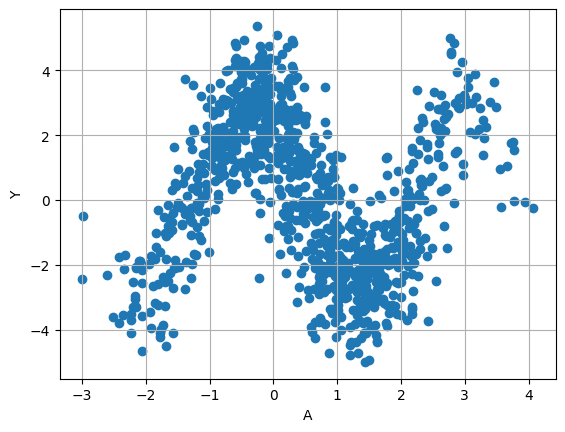

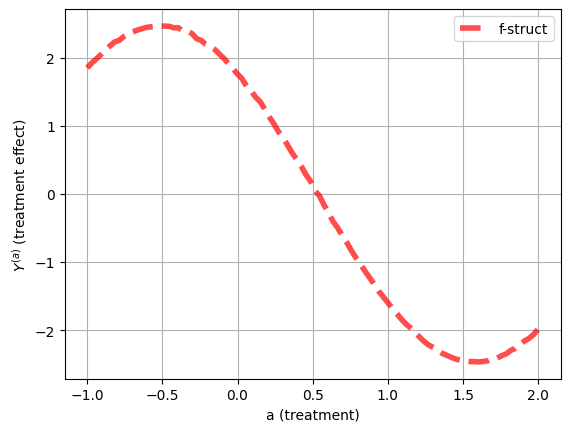

In [3]:
plt.scatter(A, Y)
plt.xlabel("A")
plt.ylabel("Y")
plt.grid()
plt.show()


plt.plot(do_A, EY_do_A, linewidth = 4, color = "red", alpha=0.7, linestyle = "dashed", label = "f-struct")
plt.grid()
plt.xlabel("a (treatment)")
plt.ylabel(r"$Y^{(a)}$ (treatment effect)")
plt.legend()

Structured function test set MSE: 0.0178043432533741
Structured function test set MAE: 0.08930692076683044


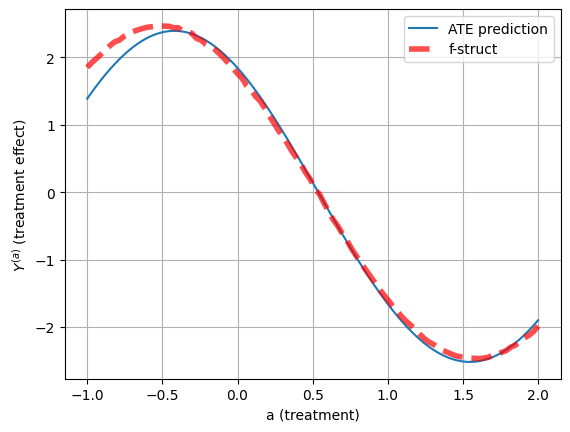

In [4]:
kpv_params = {
        "lam1_max": 0.1,
        "lam1_min": 0.001,
        "n_lam1_search": 10,
        "lam2": 0.001,
        "split_ratio": -1,
        "scale": 0.5,
    }


model = KernelPVModelV2(**kpv_params)

model.fit(train_dataset, "synthetic_low_dim")

f_struct_pred = model.predict(do_A)
structured_pred_mse = (np.mean((f_struct_pred.reshape(-1, 1) - EY_do_A.reshape(-1, 1)) ** 2))
structured_pred_mae = (np.mean(np.abs(f_struct_pred.reshape(-1, 1) - EY_do_A.reshape(-1, 1))))

print("Structured function test set MSE: {}".format(structured_pred_mse))
print("Structured function test set MAE: {}".format(structured_pred_mae))

plt.plot(do_A, f_struct_pred, label = "ATE prediction")
plt.plot(do_A, EY_do_A, linewidth = 4, color = "red", alpha = 0.7, linestyle = "dashed", label = "f-struct")
plt.grid()
plt.xlabel("a (treatment)")
plt.ylabel(r"$Y^{(a)}$ (treatment effect)")
plt.legend()
plt.show()